# QCD Shape Extrapolation

Notebook to produce templates for the QCD background estimation in W xsec/W pT analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
plt.style.use(hep.style.CMS)
import pickle
from coffea.util import load
from coffea.hist import plot
import re
from collections import OrderedDict
import scipy

load the histograms and the MC weights file

In [3]:
lumi_weights = None
with open("filefetcher/aram_samples_lpc.scales.pkl", "rb") as fin:
    lumi_weights = pickle.load(fin)
    lumi_weights["data_mu"] = 1.0
    lumi_weights["data_el"] = 1.0
output = load("hists_wptqcd_filefetcher_aram_samples_lpc_aI.coffea")

In [4]:
for name, h in output.items():
    print(name, h)

wtau2_mu Hist(
  IntCategory([-1, 1], name='charge', label='q'),
  Variable([0, 1.4442, 2.4], name='abseta', label='|\\eta|'),
  Regular(12, 0, 120, name='mt', label='M_{T}^{W} (GeV)'),
  Variable([0, 8, 16, 24, 32, 40, 50, 70, 100], name='ptW', label='p_{T}^{W} (GeV)'),
  Variable([0, 8, 16, 24, 32, 40, 50, 70, 100], name='ptW_true', label='True p_{T}^{W} (GeV)'),
  Variable([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7], name='relIso', label='lepton Relative Isolation'),
  storage=Weight()) # Sum: WeightedSum(value=4.0983e+10, variance=3.51466e+19) (WeightedSum(value=1.78887e+11, variance=1.30379e+20) with flow)
wz_mu Hist(
  IntCategory([-1, 1], name='charge', label='q'),
  Variable([0, 1.4442, 2.4], name='abseta', label='|\\eta|'),
  Regular(12, 0, 120, name='mt', label='M_{T}^{W} (GeV)'),
  Variable([0, 8, 16, 24, 32, 40, 50, 70, 100], name='ptW', label='p_{T}^{W} (GeV)'),
  Variable([0, 8, 16, 24, 32, 40, 50, 70, 100], name='ptW_true', label='True p_{T}^{W} (GeV)'),
  Var

Scale the MC histograms with their weights

In [5]:
from hist import Hist, Stack
data_mu = {name: h * lumi_weights[name] for name, h in output.items() if name.find("data") > -1 and name[-2:] == "mu"}
mc_mu = {name: h * lumi_weights[name] for name, h in output.items() if name.find("data") == -1 and name[-2:] == "mu"}
#data_el = {name: h * lumi_weights[name] for name, h in output.items() if name.find("data") > -1 and name[-2:] == "el"}
#mc_el = {name: h * lumi_weights[name] for name, h in output.items() if name.find("data") == -1 and name[-2:] == "el"}

In [6]:
# group the histograms in different channels
mc_mu_combined = OrderedDict()
mc_mu_combined['VV_mu'] = mc_mu['wz_mu'] + mc_mu['ww_mu'] + mc_mu['zz_mu']
mc_mu_combined['ttbar_mu'] = mc_mu['ttbar_dilepton_mu'] + mc_mu['ttbar_onelepton_mu'] + mc_mu['ttbar_hadronic_mu']
mc_mu_combined['DY_mu'] = mc_mu['zll_mu']
mc_mu_combined['wtau_mu'] = mc_mu['wtau2_mu'] + mc_mu['wtau1_mu'] + mc_mu['wtau0_mu']
mc_mu_combined['wl_mu'] = mc_mu['wl2_mu'] + mc_mu['wl1_mu'] + mc_mu['wl0_mu']

legends = OrderedDict()
legends['VV_mu'] = 'Dibosons'
legends['ttbar_mu'] = r't$\bar{t}$'
legends['DY_mu'] = 'DrellYan'
legends['wtau_mu'] = r'W($\tau\nu$)'
legends['wl_mu'] = r'W($\ell\nu$)'

In [7]:
mts_mu = [h.project("charge", "mt","relIso", "ptW") for _, h in mc_mu_combined.items()]
mts_mu_data = sum(h for h in data_mu.values()).project("charge","mt", "relIso", "ptW")
mts_mu_scaled = Stack(*mts_mu)

In [8]:
nIsoBins = len(data_mu['data_mu'].axes['relIso'])
nMTBins = len(list(mts_mu_data.axes['mt']))
mtBins = list(mts_mu_data.axes['mt'])
isoBins = list(data_mu['data_mu'].axes['relIso'])
nPTBins = len(list(mts_mu_data.axes['ptW']))
ptBins = list(mts_mu_data.axes['ptW'])

In [9]:
mts_mu_scaled

Stack(Hist(
  IntCategory([-1, 1], name='charge', label='q'),
  Regular(12, 0, 120, name='mt', label='M_{T}^{W} (GeV)'),
  Variable([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7], name='relIso', label='lepton Relative Isolation'),
  Variable([0, 8, 16, 24, 32, 40, 50, 70, 100], name='ptW', label='p_{T}^{W} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=17.0965, variance=0.0413005) (WeightedSum(value=42.3092, variance=0.105832) with flow), Hist(
  IntCategory([-1, 1], name='charge', label='q'),
  Regular(12, 0, 120, name='mt', label='M_{T}^{W} (GeV)'),
  Variable([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7], name='relIso', label='lepton Relative Isolation'),
  Variable([0, 8, 16, 24, 32, 40, 50, 70, 100], name='ptW', label='p_{T}^{W} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1487.78, variance=15.7094) (WeightedSum(value=5732.59, variance=55.587) with flow), Hist(
  IntCategory([-1, 1], name='charge', label='q'),
  Regular(12, 0, 120, name='mt', label

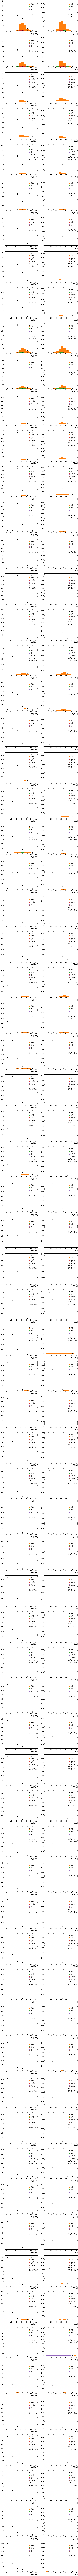

In [11]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
f, axs = plt.subplots(nIsoBins*nPTBins, 2, sharex=False, sharey=False, figsize=(20,10*nIsoBins*nPTBins))

for iwpt in range(nPTBins):
    for i, q in enumerate([-1, 1]):
        for iso in range(nIsoBins):
            ix = iwpt * nIsoBins + iso
            hep.histplot(mts_mu_data[i,:,iso, iwpt], histtype="errorbar", label=["Data"], color="black", ax=axs[ix,i])
            hep.histplot([x[i,:,iso, iwpt] for x in mts_mu_scaled], stack=True, label=[legends[name] for name, _ in mc_mu_combined.items()], ax=axs[ix,i], histtype="fill")
            handles, labels = axs[ix,i].get_legend_handles_labels()
            handles.insert(0, handles.pop())
            labels.insert(0, labels.pop())
            axs[ix,i].legend(handles, labels, fontsize=15, bbox_to_anchor=(0.95,0.97))
            #hep.cms.label(loc=0, data=True, llabel="Preliminary", ax=axs[iso,i])
            channel = r'$W^{+}\to\mu^{+}\nu$' if q>0 else r'$W^{-}\to\mu^{-}\nu$'
            isobin = '{:.2f} < I < {:.2f}'.format(isoBins[iso][0],isoBins[iso][1])
            iptbin = r'{:.2f} < $p^W_T$ < {:.2f}'.format(ptBins[iwpt][0], ptBins[iwpt][1])
            axs[ix,i].text(0.72, 0.58, channel, fontsize=15, transform=axs[ix,i].transAxes)
            axs[ix,i].text(0.72, 0.53, isobin, fontsize=15, transform=axs[ix,i].transAxes)
            axs[ix,i].text(0.72, 0.48, iptbin, fontsize=15, transform=axs[ix,i].transAxes)
            axs[ix,i].set_xlabel(r'$m_{T}$ [GeV]')
plt.show()

subtract the MC contribution from data

In [20]:
mts_mu_mc = sum(list(mts_mu_scaled))
hsubtracted = mts_mu_data + mts_mu_mc * (-1)

In [16]:
hsubtracted

Hist(
  IntCategory([-1, 1], name='charge', label='q'),
  Regular(12, 0, 120, name='mt', label='M_{T}^{W} (GeV)'),
  Variable([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7], name='relIso', label='lepton Relative Isolation'),
  Variable([0, 8, 16, 24, 32, 40, 50, 70, 100], name='ptW', label='p_{T}^{W} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1.93567e+06, variance=1.99087e+06) (WeightedSum(value=4.38114e+06, variance=4.49178e+06) with flow)

In [21]:
# normalize the histograms in different isolation bins to the same, so that it would only be the shape effects
# maybe there are more efficient ways to do this instead of looping over all bins
for iwpt in range(nPTBins):
    for i in range(2):
        h = hsubtracted.project("charge", "relIso", "ptW")[i,0,iwpt]
        for iso in range(1, nIsoBins):
            norm = float(h.value / (hsubtracted.project("charge","relIso", "ptW")[i,iso, iwpt].value))
            for imt in range(nMTBins):
                hsubtracted[i,imt,iso,iwpt] *= norm

imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1


/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/uscms_data/d3/yfeng/an

imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4


/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/uscms_data/d3/yfeng/an

imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8


/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/uscms_data/d3/yfeng/anaconda3/envs/coffea/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11
imt 0
imt 1
imt 2
imt 3
imt 4
imt 5
imt 6
imt 7
imt 8
imt 9
imt 10
imt 11


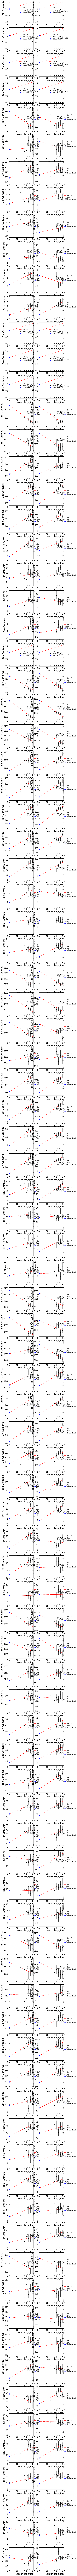

In [25]:
# hard coded iso centers
isocenters = np.array([0.225, 0.275, 0.320, 0.375, 0.425, 0.475, 0.525, 0.575])
isoSR = 0.025

plt.style.use([hep.style.ROOT, hep.style.firamath])
f, axs = plt.subplots(nMTBins*nPTBins, 2, sharex=False, sharey=False, figsize=(10,5*nMTBins*nPTBins))


def pol1(x, a, b):
    return (x - isoSR)*a + b

def pol2(x, a, b, c):
    return (x - isoSR)**2 * a + (x-isoSR)*b + c

for iwpt in range(nPTBins):
    for i, q in enumerate([-1, 1]):
        #if i!=0:
        #    continue
        print(f"iwpt {iwpt}, icharge {i}")
        for imt in range(nMTBins):
            ix = iwpt * nMTBins + imt
            #if imt!=0:
            #    continue
            values = []
            errors = []
            for iso in range(nIsoBins-1):
                #print(i, imt, iso, hsubtracted[i, imt, iso].value)
                values.append(hsubtracted[i, imt, iso, iwpt].value)
                errors.append(np.sqrt(hsubtracted[i, imt, iso, iwpt].variance))
            
            values = np.array(values)
            errors = np.array(errors)
        
            iso_extrapolated = np.arange(0., 0.25, 0.02)
            
            popt, pcov = scipy.optimize.curve_fit(pol1, isocenters[1:], values[1:], sigma=errors[1:])
            #print(popt)
            #print(np.sqrt(np.diag(pcov)))
            
            axs[ix, i].errorbar(isocenters, values, yerr=errors, marker='o', color='black', ls='none',label='Data')
            axs[ix, i].plot(isocenters[1:], pol1(isocenters[1:], *popt), 'r-', label='Pol1 Fit')
            axs[ix, i].plot(iso_extrapolated, pol1(iso_extrapolated, *popt), 'r--',)
            axs[ix, i].errorbar(isoSR, popt[1], yerr=np.sqrt(np.diag(pcov))[1], marker='o', color='blue', ls='none',markersize=10, label='Extrapolated')
            #hep.cms.label(loc=0, data=True, llabel="Preliminary", ax=axs[ix,i])
            channel = r'$W^{+}\to\mu^{+}\nu$' if q>0 else r'$W^{-}\to\mu^{-}\nu$'
            channelbin = r'{:.0f} < $m_T$ < {:.0f}'.format(mtBins[imt][0],mtBins[imt][1])
            iptbin = r'{:.2f} < $p^W_T$ < {:.2f}'.format(ptBins[iwpt][0], ptBins[iwpt][1])
            axs[ix, i].text(0.72, 0.58, channel, fontsize=15, transform=axs[ix,i].transAxes)
            axs[ix, i].text(0.72, 0.54, channelbin, fontsize=15, transform=axs[ix,i].transAxes)
            axs[ix, i].text(0.72, 0.50, iptbin, fontsize=15, transform=axs[ix,i].transAxes)
            axs[ix, i].set_xlabel('Lepton Isolation')
            axs[ix, i].set_ylabel('Bin Contents')
            axs[ix, i].legend(fontsize=15, bbox_to_anchor=(0.95,0.77))
            axs[ix, i].set_xlim(0,0.6)
            #print(values)
            #print(errors)
    

ww_el wtau1_el


AttributeError: 'Hist' object has no attribute 'scale'

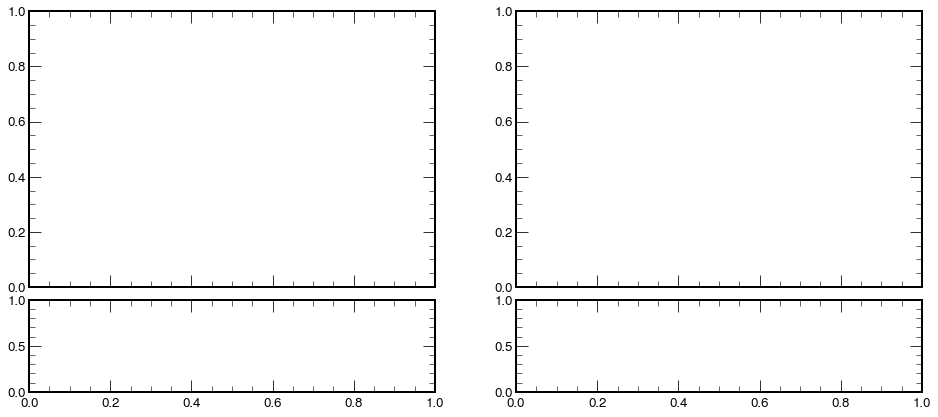

In [39]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
    fig, ((ax1, ax2),(rax1, rax2)) = plt.subplots(2, 2, figsize=(16, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    print(h1name, h2name)
    h1 = output[h1name]
    h2 = output[h2name]
    # if True: normalize histo to 1
    dense = False

    for ax, rax, h in zip([ax1, ax2], [rax1, rax2], [h1, h2]):
        # scale MC samples according to lumi (for now, dummy scale)
        scales = {
            'ttbar': 1.0,
            'ttbarprime':1.0
        }
        h.scale(scales,axis='dataset')   
        notdata = re.compile('(?!Data)')
        if hasattr(h, 'dim'):
            plot.plot1d(h[notdata], ax=ax, legend_opts={'loc':1}, density=dense, stack=True, clear=False);
            plot.plot1d(h["Data"], ax=ax, legend_opts={'loc':1}, density=dense, error_opts=data_err_opts, clear=False);
            # now we build the ratio plot
            plot.plotratio(
                   num=h["Data"].sum("dataset"),
                    denom=h[notdata].sum("dataset"),
                    ax=rax,
                    error_opts=data_err_opts,
                    denom_fill_opts={},
                    guide_opts={},
                    unc='num'
                )
        else:
            continue    
        #break
    for ax, rax, hname in zip([ax1, ax2], [rax1, rax2], [h1name, h2name]):
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
        ax.set_ylim(0.001, None)
        if hname.startswith("btag") or hname.startswith("DeepCSV_trackDecayLenVal"):
            ax.semilogy()
        rax.set_ylabel('Data/Pred.')
        rax.set_ylim(0,2)
        ax.set_xlabel(None)
        
    hep.mpl_magic(ax1)
    hep.mpl_magic(ax2)